# Analysis for 20230608-104124.xlsx

## 0. Imports

In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from ast import literal_eval
from typing import List, Union
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
from scipy import interpolate
import calendar
pd.set_option('display.max_columns', None)

## 1. Read the data

In [2]:
excel_sheet_path = r'C:\python\personal\my-open\notebooks\20230608-104124\data\20230608-104124.xlsx'
data = pd.read_excel(excel_sheet_path, engine='openpyxl')

In [3]:
data.head()

,FolderName,rated_photovoltaic_kilowatts,simulation_time_series_resolution_in_minutes,energy_management_system_time_series_resolution_in_minutes,max_storage_asset_energy_in_kilowatt_hour,min_storage_asset_energy_in_kilowatt_hour,max_storage_asset_active_power_in_kilowatts,min_storage_asset_active_power_in_kilowatts,initial_storage_asset_energy_level_percentage,required_storage_asset_terminal_energy_level_percentage,storage_asset_absolute_active_power_in_kilowatts,storage_asset_degradation_ratio_in_euros_per_kilowatt_hour,storage_asset_charging_efficiency_percentage,storage_asset_charging_efficiency_for_the_optimizer_percentage,max_inside_degree_celsius,min_inside_degree_celsius,initial_inside_degree_celsius,max_consumed_electric_heating_kilowatts,max_consumed_electric_cooling_kilowatts,heat_pump_coefficient_of_performance,chiller_coefficient_of_performance,building_thermal_capacitance_in_kilowatts_hour_per_degree_celsius,building_thermal_resistance_in_degree_celsius_per_kilowatts,export_prices_in_euros_per_kilowatt_hour,demand_charge_in_euros_per_kilowatt,max_import_kilowatts,max_export_kilowatts,offered_kilowatts_in_frequency_response,max_frequency_response_state_of_charge,min_frequency_response_state_of_charge,frequency_response_price_in_euros_per_kilowatt_hour,grid_1_voltage_level_in_kilo_volts,grid_2_voltage_level_in_kilo_volts,grid_3_voltage_level_in_kilo_volts,transformer_apparent_power_in_mega_volt_ampere,length_from_bus_2_to_bus_3_in_km,blackout_start_time_in_hours,blackout_stop_time_in_hours,save_plots,photovoltaic_generation_data_file_path,electric_load_data_file_path,data_strategy,ambient_temperature_file_path,market,import_period_prices.P1,import_period_prices.P2,import_period_prices.P3,import_period_prices.P4,import_period_prices.P5,import_period_prices.P6,buses_voltage_angle_in_degrees,buses_active_power_in_kilowatts,buses_reactive_power_in_kilovolt_ampere_reactive,market_active_power_in_kilowatts,market_reactive_power_in_kilovolt_ampere_reactive,buses_voltage_in_per_unit,active_power_demand_in_kilowatts,revenue,active_power_demand_base_in_kilowatts,imported_active_power_in_kilowatts,exported_active_power_in_kilowatts,building_power_consumption_in_kilowatts,ambient_temperature_in_degree_celsius,building_internal_temperature_in_celsius_degrees,hvac_active_power_in_kilowatts,storage_asset_accumulated_power_in_kilowatts,storage_asset_charge_or_discharge_power_in_kilowatts
0,20230608-104155_1_Commercial-275-bed Hospital,400,1,15,500,0,500,0,4,50,NaN,NaN,100,100,25,21,21,400,400,3,1,500,0.0337,0.189,0,500,-500,0,0.6,0.4,0.0059,20,0.4,0.4,0.4,0.1,11,12.5,False,data/solar_radiation/pamplona/1_min/2022-01-01...,data/electric_loads/considered_building_types,MeteoNavarra,data/ambient_temperature/pamplona/20220115_amb...,Spanish,0.1395,0.1278,0.111,0.1014,0.0927,0.0871,"[[0.0, -2.3951697643387164, -3.259090153682367...","[[-288.1100621061704, 0.0, 250.71931560876405]...","[[-16.35650436202681, 0.0, 0.0], [-16.35650436...","[288.1100621061704, 288.1100621061704, 288.110...","[16.35650436202681, 16.35650436202681, 16.3565...","[[1.0, 0.9882421049296655, 0.8728775078644493]...","[6.553399999999999, 6.553399999999999, 6.55339...",837.49,"[6.553400000000001, 6.553400000000001, 6.55340...","[[499.9999999981634], [499.9999999981608], [49...","[[249.28068438939937], [246.71989086095172], [...","[[244.16591560715298], [246.72670913556766], [...","[-3.6851740626763085, -3.9440702927850753, -4....","[20.999999999999655, 21.000000000075094, 21.00...","[244.16591560715298, 244.16591560715298, 244.1...","[244.16591560715298, 246.72670913556766, 252.0...","[1.6110480101291963e-09, 1.6413585184576165e-0..."
1,20230608-104224_2_Commercial-275-bed Hospital,400,1,15,500,0,500,0,4,50,NaN,NaN,100,100,25,21,21,400,400,3,1,500,0.0337,0.189,0,500,-500,0,0.6,0.4,0.0059,20,0.4,0.4,0.4,0.1,11,12.5,False,data/solar_radiation/pamplona/1_min/2022-01-02...,data/electric_loads/considered_building_types,MeteoNavarra,data/ambient_temperature/pamplona/202202

In [4]:
data.shape

(72, 67)

In [5]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

## 2.Reformat list columns

The list or array type columns are displayed as string type, let's modify them:

In [6]:
for column in data.columns:
    try:
        data[column] = data[column].map(literal_eval)
    except:
        print(f'{column} column not possible to transform')

FolderName column not possible to transform
rated_photovoltaic_kilowatts column not possible to transform
simulation_time_series_resolution_in_minutes column not possible to transform
energy_management_system_time_series_resolution_in_minutes column not possible to transform
max_storage_asset_energy_in_kilowatt_hour column not possible to transform
min_storage_asset_energy_in_kilowatt_hour column not possible to transform
max_storage_asset_active_power_in_kilowatts column not possible to transform
min_storage_asset_active_power_in_kilowatts column not possible to transform
initial_storage_asset_energy_level_percentage column not possible to transform
required_storage_asset_terminal_energy_level_percentage column not possible to transform
storage_asset_absolute_active_power_in_kilowatts column not possible to transform
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour column not possible to transform
storage_asset_charging_efficiency_percentage column not possible to transform


In [7]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

Get the columns that have an array like format (array, list, etc.):

In [8]:
list_columns = []
for column in data.columns:
    print(column)
    print(type(column))
    if isinstance(data[column][0], list):
        list_columns.append(column)

FolderName
<class 'str'>
rated_photovoltaic_kilowatts
<class 'str'>
simulation_time_series_resolution_in_minutes
<class 'str'>
energy_management_system_time_series_resolution_in_minutes
<class 'str'>
max_storage_asset_energy_in_kilowatt_hour
<class 'str'>
min_storage_asset_energy_in_kilowatt_hour
<class 'str'>
max_storage_asset_active_power_in_kilowatts
<class 'str'>
min_storage_asset_active_power_in_kilowatts
<class 'str'>
initial_storage_asset_energy_level_percentage
<class 'str'>
required_storage_asset_terminal_energy_level_percentage
<class 'str'>
storage_asset_absolute_active_power_in_kilowatts
<class 'str'>
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour
<class 'str'>
storage_asset_charging_efficiency_percentage
<class 'str'>
storage_asset_charging_efficiency_for_the_optimizer_percentage
<class 'str'>
max_inside_degree_celsius
<class 'str'>
min_inside_degree_celsius
<class 'str'>
initial_inside_degree_celsius
<class 'str'>
max_consumed_electric_heating_kilowatts
<class

Check the list column lengths:

In [9]:
for list_column in list_columns:
    print(f'{list_column} length: {len(data[list_column])}')

market_active_power_in_kilowatts length: 72
market_reactive_power_in_kilovolt_ampere_reactive length: 72
active_power_demand_in_kilowatts length: 72
active_power_demand_base_in_kilowatts length: 72
imported_active_power_in_kilowatts length: 72
exported_active_power_in_kilowatts length: 72
building_power_consumption_in_kilowatts length: 72
ambient_temperature_in_degree_celsius length: 72
building_internal_temperature_in_celsius_degrees length: 72
hvac_active_power_in_kilowatts length: 72
storage_asset_accumulated_power_in_kilowatts length: 72
storage_asset_charge_or_discharge_power_in_kilowatts length: 72


## 3.Plots

### 3.1. Base Demand vs Imports plot

Plot created as it appears in the original OPEN paper like this.

In [10]:
simulation_time_series_resolution_in_hours = data.simulation_time_series_resolution_in_minutes[0] / 60
hours_per_day = 24
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)

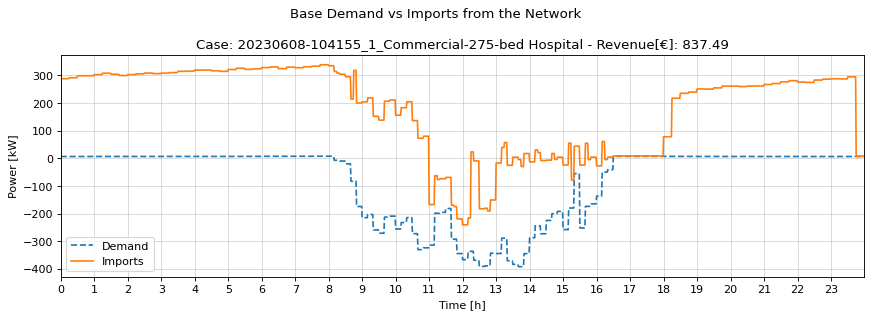

In [11]:
hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
max_time = max(hours)
figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, data.active_power_demand_base_in_kilowatts[0], '--', label='Demand')
plt.plot(hours, data.market_active_power_in_kilowatts[0], label='Imports')
plt.suptitle('Base Demand vs Imports from the Network')
subtitle = 'Case: ' + str(data.FolderName[0]) + ' - ' + 'Revenue[€]: ' + str(data.revenue[0])
plt.title(subtitle)
plt.ylabel('Power [kW]')
plt.xlabel('Time [h]')
plt.xlim(0, max_time)
plt.xticks(np.arange(0, max_time, step=1))
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()

### 3.2. Plot and save the list-array like data

In [12]:
number_of_rows = data.shape[0]
number_of_rows

72

In [13]:
number_of_columns = data.shape[1]
number_of_plots = number_of_rows * number_of_columns

In [14]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts',
 'storage_asset_charge_or_discharge_power_in_kilowatts']

In [15]:
formatting_dict = {'market_active_power_in_kilowatts': 
                   {'name': 'Market Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                   'market_reactive_power_in_kilovolt_ampere_reactive': 
                   {'name': 'Market Reactive Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Reactive Power [kVA]'},
                   'active_power_demand_in_kilowatts': 
                   {'name': 'Solar PV generation',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'active_power_demand_base_in_kilowatts': 
                   {'name': 'Solar PV generation',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'imported_active_power_in_kilowatts': 
                   {'name': 'Imported Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'exported_active_power_in_kilowatts': 
                   {'name': 'Exported Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'building_power_consumption_in_kilowatts': 
                   {'name': 'Building Electrical Consumption',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                   'ambient_temperature_in_degree_celsius': 
                   {'name': 'Ambient Temperature',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Temperature [°C]'},
                   'building_internal_temperature_in_celsius_degrees': 
                   {'name': 'Building Internal Temperature',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Temperature [°C]',
                   'max_temperature_inside': 25,
                   'min_temperature_inside': 21},
                    'hvac_active_power_in_kilowatts': 
                   {'name': 'HVAC consumption',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_accumulated_power_in_kilowatts': 
                   {'name': 'Stored Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_charge_or_discharge_power_in_kilowatts': 
                   {'name': 'Storage Asset System Charged and Discharged Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'}
                  }
                   

Save the plots in PDF format:

In [37]:
%%time
hours_per_day = 24
for number_of_row in np.arange(0, number_of_rows):
    row_data = data.iloc[number_of_row]
    figure = plt.figure(num=None, figsize=(15, 30), dpi=80, facecolor='w', edgecolor='k')
    for list_column_index in np.arange(0, len(list_columns)):
        list_column = list_columns[list_column_index]
        formatting_parameters = formatting_dict[list_column]
        column_data = row_data[list_column]
        data_length = len(column_data)
        resolution = hours_per_day / data_length 
        hours_per_resolution = np.arange(start=0, stop=hours_per_day, step=resolution)
        plt.subplot(12, 1, list_column_index + 1)
        plt.plot(hours_per_resolution, column_data)
        if 'max_temperature_inside' in formatting_parameters:
            max_temperature_inside_array = np.full(shape=hours_per_resolution.shape, 
                                                   fill_value=formatting_parameters['max_temperature_inside'])
            plt.plot(hours_per_resolution, max_temperature_inside_array, color='red', linestyle='--')
        if 'min_temperature_inside' in formatting_parameters:
            min_temperature_inside_array = np.full(shape=hours_per_resolution.shape, 
                                                   fill_value=formatting_parameters['min_temperature_inside'])
            plt.plot(hours_per_resolution, min_temperature_inside_array, color='red', linestyle='--')
        case_name = row_data['FolderName']
        splitted_case_name = case_name.split('_')
        month_number = int(splitted_case_name[1])
        month_name = calendar.month_name[month_number]
        plot_title = splitted_case_name[2]
        name = formatting_parameters['name']
        plt.title(f'{plot_title} - {name} ({month_name})')
        plt.grid(True, alpha=0.5)
        plt.xticks(np.arange(0, hours_per_resolution[-1] + 1, step=1))
        plt.xlabel(formatting_parameters['x_axis_name'])
        plt.ylabel(formatting_parameters['y_axis_name'])
        figure.tight_layout()
    pp = PdfPages(f'plots/{case_name}.pdf')
    pp.savefig()
    pp.close()
    plt.close(figure)

CPU times: total: 1min 54s
Wall time: 2min 2s


In [34]:
number_of_plots = len(os.listdir('plots'))
print('number_of_plots:', number_of_plots)

number_of_plots: 72


# Format the plots

In [17]:
test_data = data.iloc[0]
test_data

FolderName                                                        20230608-104155_1_Commercial-275-bed Hospital
rated_photovoltaic_kilowatts                                                                                400
simulation_time_series_resolution_in_minutes                                                                  1
energy_management_system_time_series_resolution_in_minutes                                                   15
max_storage_asset_energy_in_kilowatt_hour                                                                   500
                                                                                    ...                        
ambient_temperature_in_degree_celsius                         [-3.6851740626763085, -3.9440702927850753, -4....
building_internal_temperature_in_celsius_degrees              [20.999999999999655, 21.000000000075094, 21.00...
hvac_active_power_in_kilowatts                                [244.16591560715298, 244.16591560715298, 2

In [18]:
type((test_data['active_power_demand_base_in_kilowatts']))


list

In [19]:
def plot_demand_base_and_total_imported_power(simulation_time_series_resolution_in_hours: float,
                                              number_of_time_intervals_per_day: int,
                                              active_power_demand_base_in_kilowatts: np.ndarray,
                                              market_active_power_in_kilowatts: np.ndarray, case: str,
                                              revenue: float, current_time: str, plots_path: Union[str, None],
                                              save_plot: bool) -> None:
    hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
    max_time = max(hours)
    figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(hours, active_power_demand_base_in_kilowatts, '--', label='Demand')
    plt.plot(hours, market_active_power_in_kilowatts, label='Imports')
    plt.suptitle('Base Demand vs Imports from the Network')
    subtitle = 'Case: ' + str(case) + ' - ' + 'Revenue[€]: ' + str(revenue)
    plt.title(subtitle)
    plt.ylabel('Power [kW]')
    plt.xlabel('Time [h]')
    plt.xlim(0, max_time)
    plt.xticks(np.arange(0, max_time, step=1))
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    if save_plot:
        figure.savefig(f'{plots_path}/{current_time}_{case}_demand_base_and_total_imported_power.png')
    else:
        plt.show()

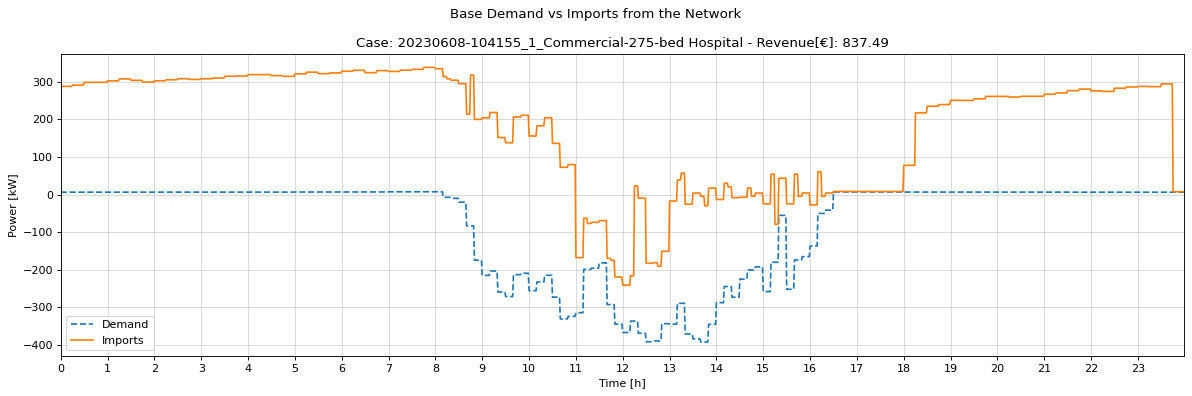

In [20]:
hours_per_day = 24
simulation_time_series_resolution_in_minutes = test_data['simulation_time_series_resolution_in_minutes']
simulation_time_series_resolution_in_hours = simulation_time_series_resolution_in_minutes / 60
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)
active_power_demand_base_in_kilowatts = test_data['active_power_demand_base_in_kilowatts']
market_active_power_in_kilowatts = test_data['market_active_power_in_kilowatts']
case = test_data['FolderName']
revenue = test_data['revenue']
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
plots_path = None
save_plot = False


plot_demand_base_and_total_imported_power(
    simulation_time_series_resolution_in_hours=simulation_time_series_resolution_in_hours,
    number_of_time_intervals_per_day=number_of_time_intervals_per_day,
    active_power_demand_base_in_kilowatts=active_power_demand_base_in_kilowatts,
    market_active_power_in_kilowatts=market_active_power_in_kilowatts,
    case=case,
    revenue=revenue,
    current_time=current_time,
    plots_path=plots_path,
    save_plot=save_plot
)

In [21]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts',
 'storage_asset_charge_or_discharge_power_in_kilowatts']

In [22]:
data_length = len(test_data['imported_active_power_in_kilowatts'])
simulation_time_series_resolution_in_hours = hours_per_day / data_length
print(number_of_time_intervals_per_day)
new_hours = np.arange(start=0, stop=hours_per_day , step=simulation_time_series_resolution_in_hours)

1440


In [23]:
len(new_hours)

96

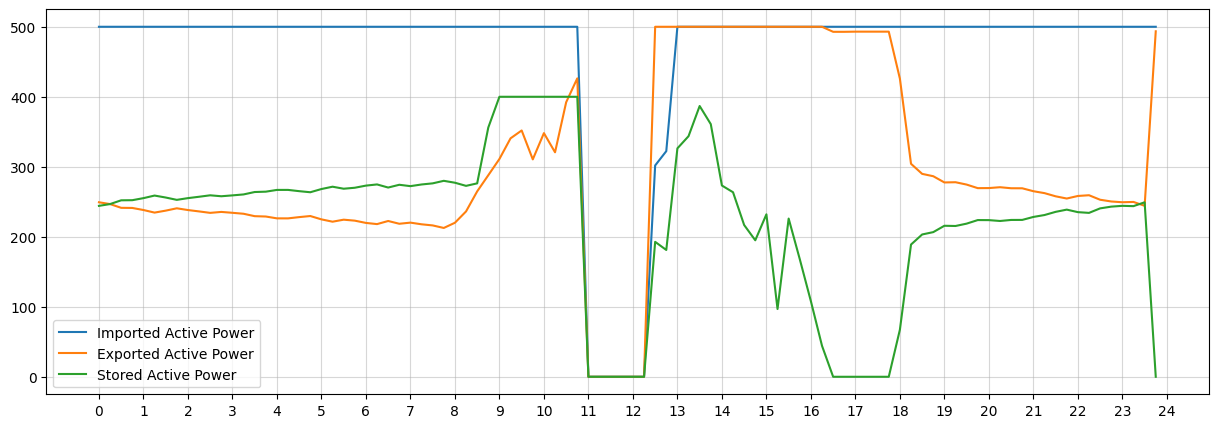

In [24]:
figure = plt.figure(figsize=(15, 5))
plt.plot(new_hours, test_data['imported_active_power_in_kilowatts'], label='Imported Active Power')
plt.plot(new_hours, test_data['exported_active_power_in_kilowatts'], label='Exported Active Power')
plt.plot(new_hours, test_data['building_power_consumption_in_kilowatts'], label='Stored Active Power')
plt.xticks(np.arange(0, new_hours[-1] + 1, step=1))
plt.grid(True, alpha=0.5)
plt.legend()

In [25]:
def downsample_array_with_average_values(array_to_resample: np.array, resample_length: int) -> np.array:
    array_to_resample_length = len(array_to_resample)
    batch_size = int(array_to_resample_length / resample_length)
    average_list = []
    for index in np.arange(start=0, stop=array_to_resample_length, step=batch_size):
        average_value = np.mean(array_to_resample[index: index+batch_size])
        average_list.append(average_value)
    return np.array(average_list[:resample_length])

In [26]:
array_to_resample = np.array(test_data['active_power_demand_base_in_kilowatts'])
resample_length = len(test_data['imported_active_power_in_kilowatts'])
resampled_active_power_demand_base_in_kilowatts = downsample_array_with_average_values(array_to_resample=array_to_resample, resample_length=resample_length)


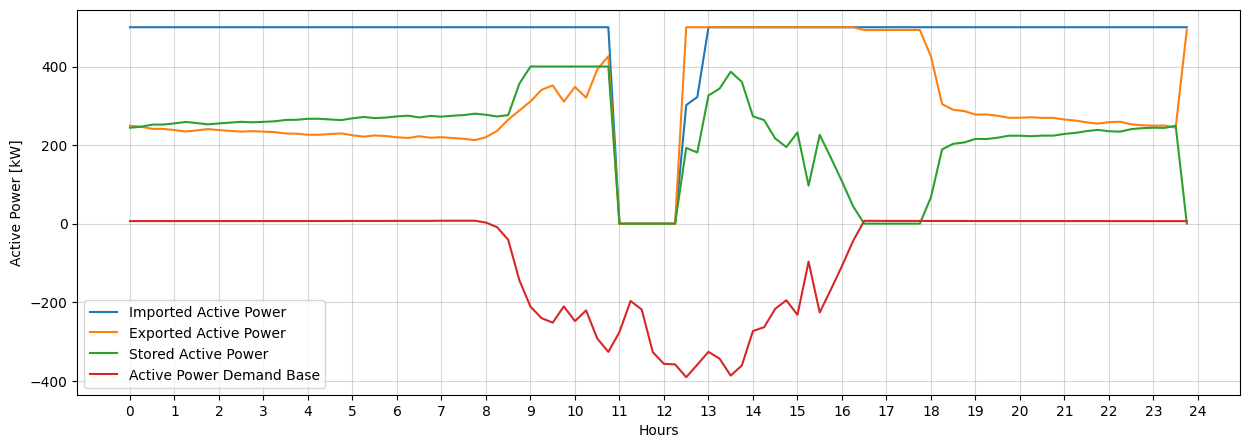

In [27]:
figure = plt.figure(figsize=(15, 5))
plt.plot(new_hours, test_data['imported_active_power_in_kilowatts'], label='Imported Active Power')
plt.plot(new_hours, test_data['exported_active_power_in_kilowatts'], label='Exported Active Power')
plt.plot(new_hours, test_data['building_power_consumption_in_kilowatts'], label='Stored Active Power')
plt.plot(new_hours, resampled_active_power_demand_base_in_kilowatts, label='Active Power Demand Base')
plt.xticks(np.arange(0, new_hours[-1] + 1, step=1))
plt.xlabel('Hours')
plt.ylabel('Active Power [kW]')
plt.grid(True, alpha=0.5)
plt.legend();

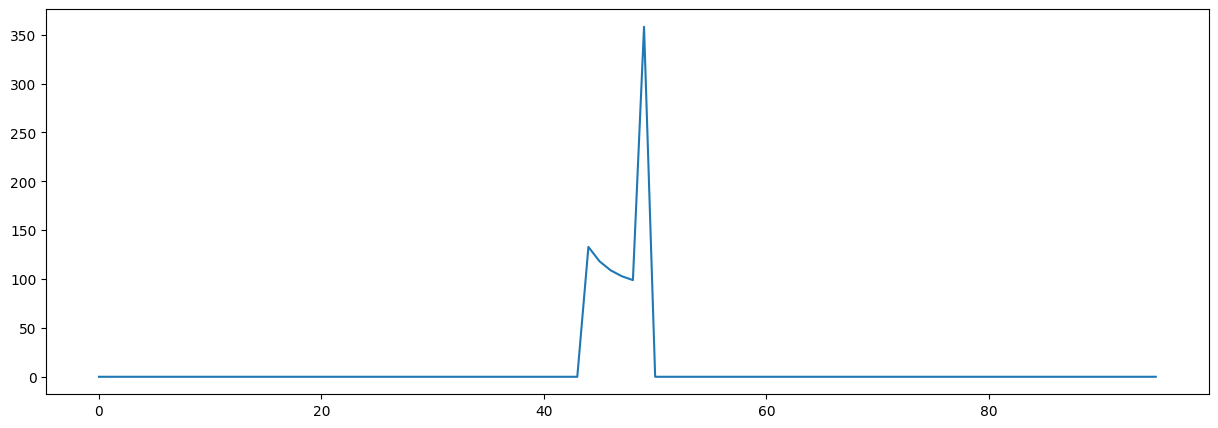

In [28]:
figure = plt.figure(figsize=(15, 5))

plt.plot(data['storage_asset_charge_or_discharge_power_in_kilowatts'][0])